In [ ]:
# Dataset:-https://drive.google.com/file/d/1Clv2BRq2ifQfOqcu3ykyDjWtjw9JuuBb/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('/content/bank-additional-full_final (3).csv')

In [ ]:
data.shape

(3574, 20)

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
#checking null values
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
#handling duplicte values
data.duplicated().sum()

np.int64(1784)

In [ ]:
#removing duplicate values
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

#handling outliers

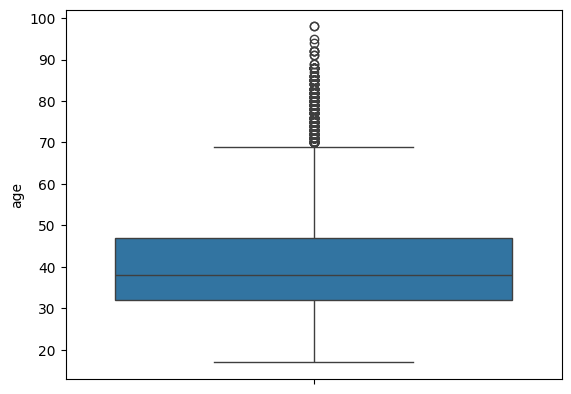

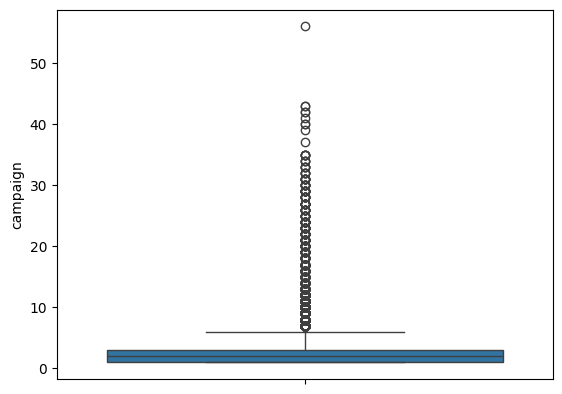

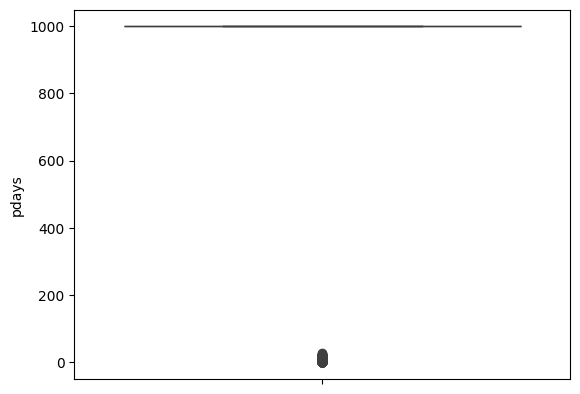

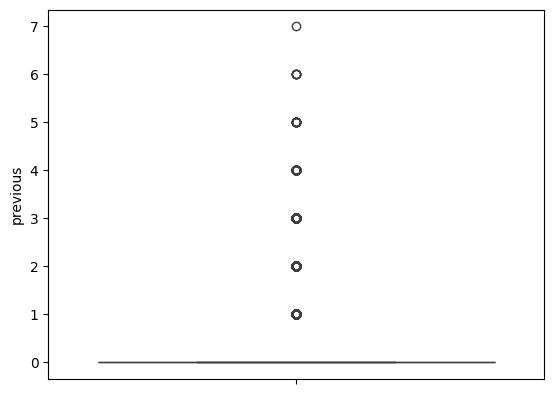

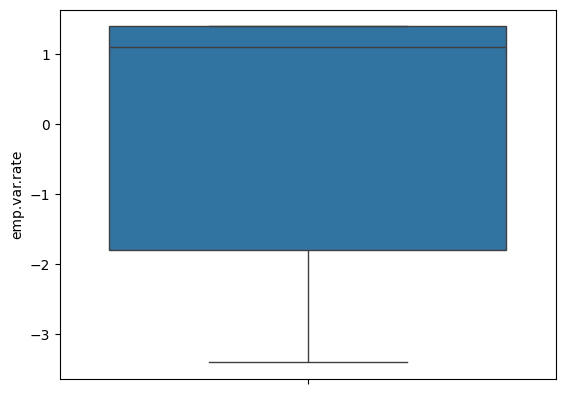

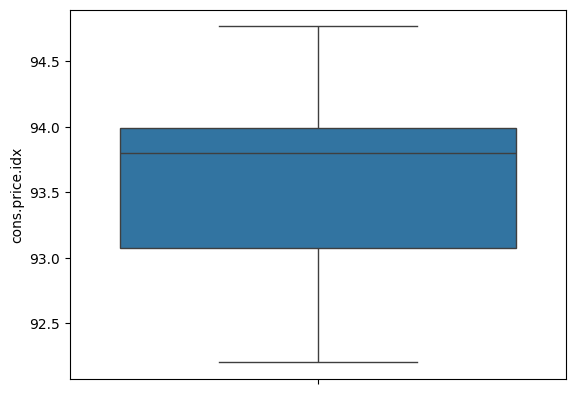

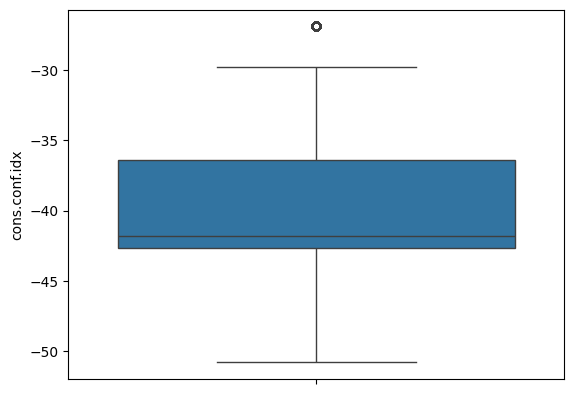

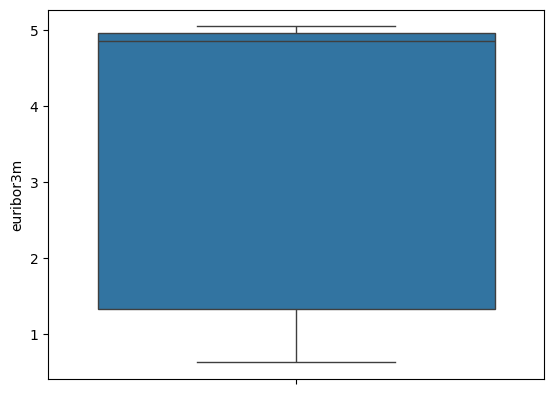

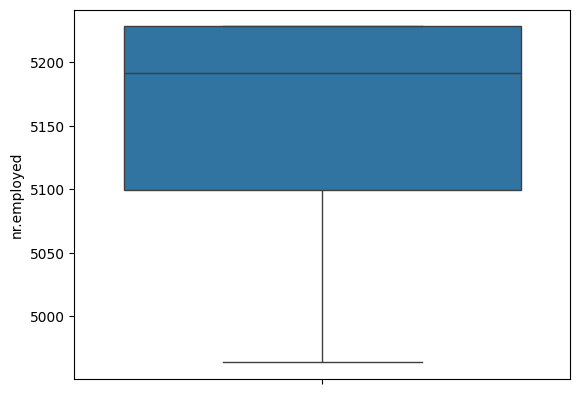

In [ ]:
for col in data.columns:
  if data[col].dtype!='object':
    sns.boxplot(data[col])
    plt.show()

#columns with outliers: age, campaign, cons.conf.idx


In [ ]:
outliers_cols=['age','campaign','cons.conf.idx']
for col in outliers_cols:
  q1=data[col].quantile(0.25)
  q2=data[col].quantile(0.75)
  iq3=q2-q1
  Lb=q1-1.5*iq3
  Ub=q2+1.5*iq3
  data=data[(data[col]>=Lb) & (data[col]<=Ub)]

#label encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
for col in data.columns:
  if data[col].dtype=='object':
      data[col]=le.fit_transform(data[col])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3574 entries, 2 to 40855
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3574 non-null   int64  
 1   job             3574 non-null   int64  
 2   marital         3574 non-null   int64  
 3   education       3574 non-null   int64  
 4   default         3574 non-null   int64  
 5   housing         3574 non-null   int64  
 6   loan            3574 non-null   int64  
 7   contact         3574 non-null   int64  
 8   month           3574 non-null   int64  
 9   day_of_week     3574 non-null   int64  
 10  campaign        3574 non-null   int64  
 11  pdays           3574 non-null   int64  
 12  previous        3574 non-null   int64  
 13  poutcome        3574 non-null   int64  
 14  emp.var.rate    3574 non-null   float64
 15  cons.price.idx  3574 non-null   float64
 16  cons.conf.idx   3574 non-null   float64
 17  euribor3m       3574 non-null   float

In [ ]:
x=data.drop('y',axis=1)
y=data['y']


#If the input columns are dependent to each other then there will be multi-collinearity. we have to get rid of mulitcollinearity. To identify multi collinarity we use "VIF".

If vif value is greater than 5(val>5) we remove those columns.

In [ ]:
x.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#2d array , DataFrame


In [ ]:
vif_df=pd.DataFrame()
vif_df

""


In [ ]:
vif_df['features']=x.columns
vif_df

,features
0,age
1,job
2,marital
3,education
4,default
5,housing
6,loan
7,contact
8,month
9,day_of_week


In [ ]:
vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['multi-collinearty']=vif_values

In [ ]:
vif_df

,features,multi-collinearty
0,age,292.850241
1,job,2.040873
2,marital,5.007447
3,education,5.140397
4,default,1.417757
5,housing,2.095010
6,loan,1.218030
7,contact,21.202930
8,month,26.502404
9,day_of_week,3.327438


now drop the each column one by one which having the highest vif value

In [ ]:
x.drop('nr.employed',axis=1,inplace=True)

Now continue the same process untill you remove all multi collinearity columns.


In [ ]:
vif_df=pd.DataFrame()
vif_df['features']=x.columns
vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['multi-collinearty']=vif_values

In [ ]:
vif_df

,features,multi-collinearty
0,age,292.680403
1,job,2.040870
2,marital,5.004980
3,education,5.140363
4,default,1.416809
5,housing,2.094948
6,loan,1.217964
7,contact,18.661140
8,month,26.502370
9,day_of_week,3.315369


In [ ]:
x.drop('cons.price.idx',axis=1,inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['features']=x.columns
vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['multi-collinearty']=vif_values

In [ ]:
vif_df

,features,multi-collinearty
0,age,235.736643
1,job,2.038561
2,marital,4.970156
3,education,5.103621
4,default,1.416638
5,housing,2.093665
6,loan,1.214462
7,contact,14.795692
8,month,25.001941
9,day_of_week,3.271514


In [ ]:
x.drop('cons.conf.idx',axis=1,inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['features']=x.columns
vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['multi-collinearty']=vif_values

In [ ]:
vif_df

,features,multi-collinearty
0,age,205.437548
1,job,2.038507
2,marital,4.949219
3,education,5.082882
4,default,1.413157
5,housing,2.088109
6,loan,1.214350
7,contact,12.169462
8,month,21.487372
9,day_of_week,3.269941


In [ ]:
x.drop('age',axis=1,inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['features']=x.columns
vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['multi-collinearty']=vif_values

In [ ]:
vif_df

,features,multi-collinearty
0,job,2.038173
1,marital,4.916670
2,education,5.080486
3,default,1.401292
4,housing,2.088047
5,loan,1.213173
6,contact,11.943314
7,month,21.487090
8,day_of_week,3.269709
9,campaign,9.105263


In [ ]:
x.drop('euribor3m',axis=1,inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['features']=x.columns
vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['multi-collinearty']=vif_values
vif_df

,features,multi-collinearty
0,job,2.036830
1,marital,4.913616
2,education,5.078387
3,default,1.400064
4,housing,2.086835
5,loan,1.213140
6,contact,11.611621
7,month,17.886560
8,day_of_week,3.267458
9,campaign,9.069939


In [ ]:
x.drop('pdays',axis=1,inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['features']=x.columns
vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['multi-collinearty']=vif_values
vif_df

,features,multi-collinearty
0,job,2.016539
1,marital,4.750736
2,education,4.858647
3,default,1.393154
4,housing,2.061682
5,loan,1.211788
6,contact,9.130441
7,month,9.765593
8,day_of_week,3.219377
9,campaign,8.067038


In [ ]:
x.drop('poutcome',axis=1,inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['features']=x.columns
vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['multi-collinearty']=vif_values
vif_df

,features,multi-collinearty
0,job,2.013266
1,marital,4.663214
2,education,4.795510
3,default,1.391599
4,housing,2.051827
5,loan,1.210430
6,contact,7.782703
7,month,9.093236
8,day_of_week,3.205953
9,campaign,7.613719


In [ ]:
x.drop('month',axis=1,inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['features']=x.columns
vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['multi-collinearty']=vif_values
vif_df

,features,multi-collinearty
0,job,1.989015
1,marital,4.389364
2,education,4.365382
3,default,1.386886
4,housing,1.985294
5,loan,1.208100
6,contact,7.660253
7,day_of_week,2.899544
8,campaign,6.224802
9,previous,1.368644


In [ ]:
x.drop('contact',axis=1,inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['features']=x.columns
vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['multi-collinearty']=vif_values
vif_df

,features,multi-collinearty
0,job,1.976042
1,marital,4.243713
2,education,4.266125
3,default,1.375058
4,housing,1.981603
5,loan,1.205342
6,day_of_week,2.867046
7,campaign,5.875305
8,previous,1.368643
9,emp.var.rate,1.917890


In [ ]:
x.drop('campaign',axis=1,inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['features']=x.columns
vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i)
  vif_values.append(vif)

vif_df['multi-collinearty']=vif_values
vif_df

,features,multi-collinearty
0,job,1.962607
1,marital,3.834602
2,education,3.790527
3,default,1.366334
4,housing,1.921846
5,loan,1.202172
6,day_of_week,2.663901
7,previous,1.354883
8,emp.var.rate,1.767018


#Training model

In [ ]:
# 1.importing necessary libraries.
# 2.spliting data into x,y variables.
# 3.dividing  data to training and testing purposes
# 4.model implementing
# 5.check the accuracy of the model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=70)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Lr=LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_test_pred=Lr.predict(x_test)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_test

,y
10196,0
2417,1
5061,0
7648,0
40155,1
...,...
4369,0
24623,0
4106,0
557,0


In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score(y_test,y_test_pred)*100

92.02797202797203

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[649,   9],
       [ 48,   9]])